In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
HTrain = pd.read_csv('https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%203%20Linear%20Regression/housing_train.csv')
HTrain.shape

(16512, 9)

In [6]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [7]:
HTrain.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-0.006282,0.005285,-0.002479,0.002861,0.003953,0.000862,0.001170,0.005308,207194.693738
std,1.001083,1.000358,1.001370,0.996830,0.999107,1.004081,0.996462,1.002378,115622.626448
min,-2.385992,-1.442886,-2.196180,-1.207283,-1.277688,-1.256123,-1.303984,-1.774299,14999.000000
25%,-1.118200,-0.796789,-0.845393,-0.541705,-0.572483,-0.562043,-0.574229,-0.686382,119800.000000
50%,0.528931,-0.642287,0.028646,-0.232294,-0.238062,-0.228249,-0.234201,-0.171005,179850.000000
75%,0.778496,0.977638,0.664310,0.240303,0.262675,0.265378,0.278458,0.475058,265125.000000
max,2.625280,2.958068,1.856182,16.815580,14.087789,30.250330,14.601520,5.858286,500001.000000


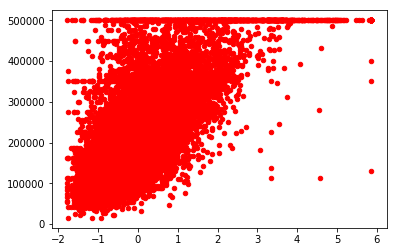

In [8]:
plt.figure()
plt.scatter(HTrain['median_income'],HTrain['median_house_value'],s=20,c='red');
#as there are some data point scattered away it is weak postivie rather than strong positive
#for strong strong postivie no points should be scattered

In [9]:
HTrain['median_income'].corr(HTrain['median_house_value'])

0.6906466061467708

<h3>Step 1</h3>

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<h3>Step 2</h3>

In [11]:
lin_reg = LinearRegression()  #creating instance of LinearRegression

<h3>Step 3</h3>

In [12]:
lin_reg.fit(HTrain[['median_income']],HTrain['median_house_value']) #build linear regression model for income and house value
#feature matrix is 2d as income has only one varaible but taking two squares as 2D

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h3>Step 4</h3>

In [13]:
lin_reg.coef_  # slope m

array([79664.90785833])

In [14]:
lin_reg.intercept_  #intercept

206771.86405797795

<h3>Step 5</h3>

In [15]:
lin_reg.score(HTrain[['median_income']],HTrain['median_house_value'])

0.47699273458205255

In [16]:
y_pred_train = lin_reg.predict(HTrain[['median_income']])
y_pred_train[:5]

array([181147.30465315, 204332.52998299, 218749.38740458, 125916.23161656,
       193501.01668457])

In [17]:
HTrain.median_house_value[:5]

0    103000.0
1    382100.0
2    172600.0
3     93400.0
4     96500.0
Name: median_house_value, dtype: float64

In [18]:
lin_rmse = np.sqrt(mean_squared_error(HTrain['median_house_value'],y_pred_train))
lin_rmse

83614.87409655548

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

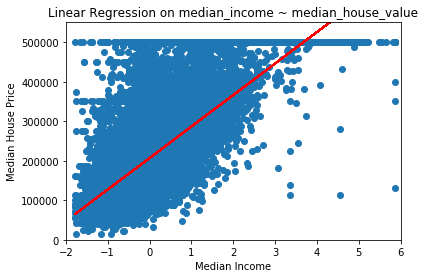

In [19]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_train,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')

<h3>Best fit using Gradient Decent</h3>

In [20]:
from sklearn.linear_model import SGDRegressor

In [21]:
gdreg = SGDRegressor()

In [22]:
gdreg.fit(HTrain[['median_income']],HTrain['median_house_value'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [23]:
gdreg.coef_

array([81678.62413369])

In [24]:
gdreg.intercept_

array([206037.15320124])

In [25]:
gdreg.score(HTrain[['median_income']],HTrain['median_house_value'])

0.47664874881835956

In [26]:
y_pred_gd = gdreg.predict(HTrain[['median_income']])
y_pred_gd[:5]

array([179764.87331685, 203536.15927049, 218317.4363746 , 123137.70614459,
       192430.85422107])

In [27]:
HTrain.median_house_value[:5]

0    103000.0
1    382100.0
2    172600.0
3     93400.0
4     96500.0
Name: median_house_value, dtype: float64

In [28]:
gdreg_rmse = np.sqrt(mean_squared_error(HTrain['median_house_value'],y_pred_gd))
gdreg_rmse

83642.36663870486

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

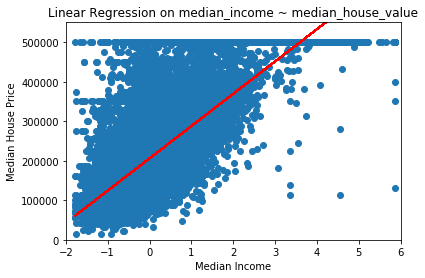

In [29]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_gd,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')

<h3>2. Multiple Linear Regression</h3>

In [30]:
model_all = LinearRegression()

In [31]:
HTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.267645,-1.367976,0.346478,0.224718,0.214986,0.772251,0.322924,-0.321654,103000.0
1,0.703627,-0.871699,1.617807,0.342065,0.596500,-0.098440,0.670799,-0.030620,382100.0
2,-0.454356,-0.455012,-1.957806,-0.338639,-0.490815,-0.450778,-0.427755,0.150349,172600.0
3,1.227714,-1.377340,0.584852,-0.556832,-0.404974,-0.006602,-0.378059,-1.014947,93400.0
4,-0.114948,0.537543,1.141059,-0.116322,-0.252369,-0.486983,-0.312669,-0.166583,96500.0


In [32]:
#feature matrix
X_train = HTrain.drop('median_house_value', axis=1)
X_train.head()
X_train.shape

(16512, 8)

In [33]:
#Traget Array
y_train = HTrain.median_house_value
y_train.head()
y_train.shape

(16512,)

In [34]:
model_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
model_all.coef_

array([-85413.28005747, -90669.136247  ,  14885.95835764, -17862.58294108,
        48757.37209674, -43589.91735845,  17717.71485854,  77013.87535191])

In [36]:
model_all.intercept_

206640.6370318638

In [37]:
model_all.score(X_train,y_train)

0.6400947924305294

In [38]:
y_pred_all = model_all.predict(X_train)
y_pred_all

array([181313.23430336, 286451.78145111, 263328.07605751, ...,
       191338.67423602, 273178.05856515, 278432.75202799])

In [39]:
All_rmse = np.sqrt(mean_squared_error(HTrain.median_house_value,y_pred_all))
All_rmse

69362.34135238081

Text(0.5, 1.0, 'Linear Regression on median_income ~ median_house_value')

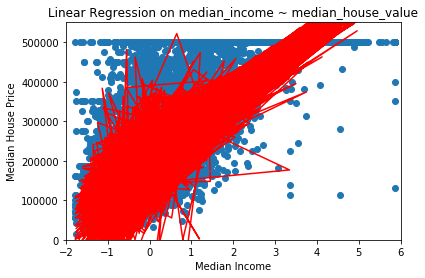

In [40]:
plt.scatter(HTrain[['median_income']],HTrain['median_house_value'])
plt.plot(HTrain[['median_income']],y_pred_all,'r')
plt.axis([-2,6,0,550000])
plt.xlabel('Median Income')
plt.ylabel('Median House Price')
plt.title('Linear Regression on median_income ~ median_house_value')

<h3>Adding one by one feature one by one to understand multiple linear regression</h3>

In [41]:
HTrain.corr

<bound method DataFrame.corr of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       1.267645 -1.367976            0.346478     0.224718        0.214986   
1       0.703627 -0.871699            1.617807     0.342065        0.596500   
2      -0.454356 -0.455012           -1.957806    -0.338639       -0.490815   
3       1.227714 -1.377340            0.584852    -0.556832       -0.404974   
4      -0.114948  0.537543            1.141059    -0.116322       -0.252369   
5      -1.143157  0.837182           -0.686477     1.098404        0.646574   
6       0.798462 -0.745288           -0.050812    -0.435359       -0.285751   
7      -1.477574  1.066594            0.664310    -0.051231       -0.331056   
8       0.833401 -0.703151           -1.878348    -0.692056       -0.526582   
9       0.888305 -0.754652           -1.878348     7.359055        5.544260   
10     -1.437644  0.977638            1.856182    -0.758064       -0.810333   
11      0.608792 -0.

<h3>Model with longitutude variabe</h3>

In [42]:
model1 = LinearRegression()
model1.fit(X_train[['longitude']],y_train)
model1.coef_
model1.intercept_
model1.score(X_train[['longitude']],y_train)

0.0021482189561508047

<h3>Model with longitutude and lattitude variabe</h3>

In [43]:
model2 = LinearRegression()
model2.fit(X_train[['longitude','latitude']],y_train)
model2.coef_
model2.intercept_
model2.score(X_train[['longitude','latitude']],y_train)

0.23977500440286748

<h3>Model with longitutude , lattitude variabe and housing_median_age and find coefficient of housing_median_age</h3>

In [44]:
model3 = LinearRegression()
model3.fit(X_train[['longitude','latitude','housing_median_age']],y_train)
print(model3.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model3.intercept_
model3.score(X_train[['longitude','latitude','housing_median_age']],y_train)

[-143091.95032316 -148898.94074324   -1803.0265797 ]


0.24000307748194905

<h3>Model with longitutude ,lattitude, housing and toatl variabe</h3>

In [45]:
model4 = LinearRegression()
model4.fit(X_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)
print(model4.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model4.intercept_
model4.score(X_train[['longitude','latitude','housing_median_age','total_rooms']],y_train)

[-139918.19489232 -145458.44039198    5180.33149439   18588.32272379]


0.26221824117424786

<h3>Model with longitutude,lattitude variabe, Housing, total rooms and toatal bed rooms</h3>

In [46]:
model5 = LinearRegression()
model5.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)
print(model5.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model5.intercept_
model5.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']],y_train)

[-140821.79695263 -148740.880461      6374.50953443   88723.50645406
  -74804.09155293]


0.31771834380202746

<h3>Model with longitutude,lattitude variabe, Housing, total rooms , toatal bed rooms and population</h3>

In [47]:
model5 = LinearRegression()
model5.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)
print(model5.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model5.intercept_
model5.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population']],y_train)

[-144389.62331851 -155699.63277662    6583.01551464  108502.58659167
  -38029.63257305  -62562.8816911 ]


0.3801845000742564

<h3>Model with longitutude,lattitude variabe, Housing, total rooms , toatal bed rooms, population and households</h3>

In [48]:
model6 = LinearRegression()
model6.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)
print(model6.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model6.intercept_
model6.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households']],y_train)

[-139798.10182907 -151645.85741153    6391.26182068  108158.05257741
  -72441.0594132   -71027.870383     43062.25888446]


0.3840491803301826

<h3>Model with longitutude,lattitude variabe, Housing, total rooms , toatal bed rooms, population, households and median_income</h3>

In [49]:
model7 = LinearRegression()
model7.fit(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)
print(model7.coef_)#1st value for longtitude 2nd for latitude 3rd for housing
model7.intercept_
model7.score(X_train[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']],y_train)

[-85413.28005747 -90669.136247    14885.95835764 -17862.58294108
  48757.37209674 -43589.91735845  17717.71485854  77013.87535191]


0.6400947924305294

<h3>Feature selection</h3>

<h3>1. Applying select K best feature selection method</h3>

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

In [51]:
select_feature = SelectKBest(f_regression,k=6).fit(X_train, y_train)

In [52]:
select_feature.scores_

array([3.55434501e+01, 3.44579030e+02, 1.79495552e+02, 3.01823325e+02,
       3.80956840e+01, 1.11961694e+01, 6.72961323e+01, 1.50574391e+04])

In [53]:
select_feature.pvalues_

array([2.54505126e-09, 3.82179753e-76, 1.01919784e-40, 5.20398942e-67,
       6.89318215e-10, 8.21491618e-04, 2.50682998e-16, 0.00000000e+00])

In [54]:
selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'P_values':select_feature.pvalues_})
selected_features_df.sort_values(by='P_values', ascending=True)

,Feature,P_values
7,median_income,0.000000e+00
1,latitude,3.821798e-76
3,total_rooms,5.203989e-67
2,housing_median_age,1.019198e-40
6,households,2.506830e-16
4,total_bedrooms,6.893182e-10
0,longitude,2.545051e-09
5,population,8.214916e-04


In [55]:
X_train_new = select_feature.transform(X_train)
X_train_new.shape

(16512, 6)

In [56]:
model_kbest = model_all.fit(X_train_new,y_train)

In [57]:
model_kbest.coef_

array([ -7201.82086955,  24397.45111862, -54757.3570668 ,  63885.16881336,
          784.47820083,  93449.65845946])

In [58]:
model_kbest.score(X_train_new,y_train)

0.5540145192388106

In [59]:
y_pred_kbest = model_kbest.predict(X_train_new)

In [60]:
lin_rmse_kbest = np.sqrt(mean_squared_error(y_train, y_pred_kbest))
lin_rmse_kbest

77212.93113565829

<h3>2. Applying Recursive Feature Elimination Method</h3>

In [61]:
from sklearn.feature_selection import RFE

In [62]:
rfe = RFE(estimator=model_all,step =3)
#step will drop variables in each iteration.

In [63]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=3, verbose=0)

In [64]:
rfe.ranking_

array([1, 1, 3, 3, 1, 2, 3, 1])

In [65]:
selected_rfe_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,longitude,1
1,latitude,1
4,total_bedrooms,1
7,median_income,1
5,population,2
2,housing_median_age,3
3,total_rooms,3
6,households,3


In [66]:
X_train_rfe = rfe.transform(X_train)
X_train_rfe.shape

(16512, 4)

In [67]:
model_rfe = model_all.fit(X_train_rfe,y_train)

In [68]:
print(model_rfe.coef_)
print(model_rfe.intercept_)

[ -99769.10837052 -103067.90916562    6308.59029907   70148.4231635 ]
206715.37035221973


In [69]:
model_rfe.score(X_train_rfe,y_train)

0.5901689024984469

In [70]:
y_pred_rfe = model_rfe.predict(X_train_rfe)

In [71]:
lin_rmse_rfe = np.sqrt(mean_squared_error(y_train,y_pred_rfe))
lin_rmse_rfe

74017.1116468229

<h3>Predictions on Test Data</h3>

In [72]:
HTest = pd.read_csv('https://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%203%20Linear%20Regression/housing_test.csv')

In [73]:
HTest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.279366,0.200449,-0.289187,-0.518327,-0.242831,-0.029562,-0.367597,-1.152489,47700.0
1,0.054757,-0.230283,0.108104,0.140833,-0.242831,0.123206,0.220915,-0.705015,45800.0
2,-1.432653,1.015093,1.856182,0.547423,-0.242831,-0.101972,1.212230,-0.205588,500001.0
3,0.424114,-0.632923,-0.924851,0.190339,-0.242831,0.246834,-0.011874,0.982710,218600.0
4,-1.178096,0.462633,0.425936,-0.130532,-0.242831,-0.320086,-0.187120,-0.076678,278000.0


In [79]:
X_test = HTest.drop('median_house_value',axis=1)
print(X_test.head())
X_test.shape

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.279366  0.200449           -0.289187    -0.518327       -0.242831   
1   0.054757 -0.230283            0.108104     0.140833       -0.242831   
2  -1.432653  1.015093            1.856182     0.547423       -0.242831   
3   0.424114 -0.632923           -0.924851     0.190339       -0.242831   
4  -1.178096  0.462633            0.425936    -0.130532       -0.242831   

   population  households  median_income  
0   -0.029562   -0.367597      -1.152489  
1    0.123206    0.220915      -0.705015  
2   -0.101972    1.212230      -0.205588  
3    0.246834   -0.011874       0.982710  
4   -0.320086   -0.187120      -0.076678  


(4128, 8)

In [77]:
y_test = HTest.median_house_value
print(y_test.shape)
print(X_test.shape)
print(X_train.shape)
y_test.head()

(4128,)
(4128, 8)
(16512, 8)


0     47700.0
1     45800.0
2    500001.0
3    218600.0
4    278000.0
Name: median_house_value, dtype: float64

In [80]:
y_pred_test = model_all.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
SSE = np.sum((y_pred_test-y_test)**2)
SST = np.sum((y_test-np.mean(y_train))**2)
r2_test = 1 - SSE/SST
print("Test RMSE : ", rmse_test)
print("Test SSE : ", SSE)
print("Test SST : ", SST)
print("Test R2 : ", r2_test)

ValueError: shapes (4128,8) and (4,) not aligned: 8 (dim 1) != 4 (dim 0)